# Introduction

The main benefits of using PyGOM are probably most evident when it is applied to compartmental models.
This class of model is used to represent systems involving the transport of material (continuous or discrete) between different categories.
These are commonly employed in epidemiology, in which humans (or animals) may flow between different disease states, but are also found in chemistry, tracking the formation of molecules, or in economics, where money may move from one sector to another.

To outline the key features of a compartmental model, we build on a simple Susceptible-Infected-Recovered (SIR) epidemic model with examples of increasing complexity.

```{note}
For those unfamiliar with the SIR model, an outline can be found in the {doc}`common models <common_models/SIR>` section.
```

## Transitions between states

In the simplest SIR compartmental model, individuals move from one state to another through 2 types of transition:

- Infection, which turns a Susceptible individual into an Infected one
- Recovery, which turns an Infected individual into a Recovered one

To fully specify the dynamics of the system, we must supplement these events with the rate at which they occur.
In this case, infections occur at a rate $\frac{\beta S I}{N}$ and recoveries at a rate $\gamma I$.

We can graphically represent compartmental models using boxes (nodes) to indicate the states and arrows (directed edges) to show the transfer of individuals.
The arrows are then annotated with the rate at which the transitions occur and it is implied that a transition event leads to the transfer of one individual.

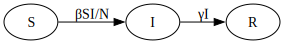

In [20]:
from graphviz import Digraph

dot = Digraph()

dot.body.extend(['rankdir=LR'])

states=['S', 'I', 'R']

for s in states:
    dot.node(s)

dot.attr(size='5,5')

dot.edge('S', 'I', label='&beta;SI/N')
dot.edge('I', 'R', label='&gamma;I')

dot

## Transitions in to and out of the system

It is not complicated to extend the compartmental model framework to transitions which are not between states.
This could appear in the SIR model through births and deaths, for example.
Here, we allow individuals to be born in a susceptible state at a rate, $\mu$, proportional to the total population, $N$.
We also have deaths occurring from each compartment at the same rate, proportional to the population of the respective compartment.

To indicate these graphically, birth and death processes lack an origin or a destination state respectively:

In [ ]:
dot = Digraph()

dot.body.extend(['rankdir=LR'])

states=['S', 'I', 'R']

for s in states:
    dot.node(s)

dot.edge('S', 'I', label='&beta;SI/N')
dot.edge('I', 'R', label='&gamma;I')

dot.node("bornS", label="", shape='none', height="0", width="0")
dot.edge('bornS', 'S', label="&mu;N")

dot.node("deadS", label="", shape="none", height="0", width="0")
dot.edge('S', 'deadS', label="&mu;S")

dot.node("deadI", label="", shape="none", height="0", width="0")
dot.edge('I', 'deadI', label="&mu;I")

dot.node("deadR", label="", shape="none", height="0", width="0")
dot.edge('R', 'deadR', label="&mu;R")

dot

```{note}
We may actually be interested in tracking the total number of deaths, in which case we would define a new compartment, say $D$, and have this as the destination state for the death processes. 
```

## Correlated transitions

It is possible for an event to trigger multiple transitions to occur.
For instance, let's examine what happens if we wish to track the cumulative number of infections.
Every time an infection occurs, as well as an individual transferring from $S$ to $I$, the $I_{tot}$ compartment increments by 1 too.
We show this graphically as a birth process into $I_{tot}$ and indicate that it is correlated with the $S\rightarrow I$ transition by a shared colour (the default colour, black, does not imply correlation so that recovery, births and deaths are independent processes).
Correlated transitions have the same underlying rate, so that, strictly speaking, only one rate needs be specified along the blue edges.
However, it can help for clarity to include the $\frac{\beta S I}{N}$ in both cases, as we have done here.

In [ ]:
dot = Digraph()

dot.body.extend(['rankdir=LR'])

states=['S', 'I', 'R']

for s in states:
    dot.node(s)

dot.edge('S', 'I', label='&beta;SI/N', color="blue")
dot.edge('I', 'R', label='&gamma;I')

dot.node("bornS", label="", shape="none", height="0", width="0")
dot.edge('bornS', 'S', label="&mu;N")

dot.node("deadS", label="", shape="none", height="0", width="0")
dot.edge('S', 'deadS', label="&mu;S")

dot.node("deadI", label="", shape="none", height="0", width="0")
dot.edge('I', 'deadI', label="&mu;I")

dot.node("deadR", label="", shape="none", height="0", width="0")
dot.edge('R', 'deadR', label="&mu;R")

dot.node("It", label="", shape="none", height="0", width="0")
dot.edge('It', 'Iₜₒₜ', label='&beta;SI/N', color="blue")

dot

### Non singular transitions

The final feature we should account for is the magnitude of transitions.
So far, we have only dealt with transitions which result in the state populations changing by $\pm 1$.
This is typically the case for epidemic compartmental models, where we are dealing with the movement of individuals.
We could imagine scenarios, such as vaccinations being administered in batches of, say, 100, meaning that in one vaccination round 100 individuals will move from $S$ to $R$ in one go.
Or, perhaps, if we restrict our study a cohort of twins then each birth event increments the $S$ population by 2.

It is more common, however, to find these kinds of situations in the study chemical systems.
For example, if we were tracking populations of $\mathrm{H}_2$, $\mathrm{O}_2$ and $\mathrm{H}_2\mathrm{O}$ in the synthesis of water, then one reaction results in population changes: $\mathrm{H}_2$: -2, $\mathrm{O}_2$: -1 and $\mathrm{H}_2\mathrm{O}$ +2.

In our SIR model, let's say we wish to track the monetary cost of the epidemic, $M$.
With this example, we see that the magnitude of a transition need not be an integer quantity.
If each infection costs $c$ monetary units then we must add another correlated transition to our model.
This time, we must indicate that the transition has a different magnitude and we do so by adding a label of the amount to the arrowhead.

In [ ]:
from graphviz import Digraph


dot = Digraph()

dot.body.extend(['rankdir=LR'])

states=['S', 'I', 'R']

for s in states:
    dot.node(s)

dot.edge('S', 'I', label='&beta;SI/N', color="blue")
dot.edge('I', 'R', label='&gamma;I')

dot.node("bornS", label="", shape="none", height="0", width="0")
dot.edge('bornS', 'S', label="&mu;N")

dot.node("deadS", label="", shape="none", height="0", width="0")
dot.edge('S', 'deadS', label="&mu;S")

dot.node("deadI", label="", shape="none", height="0", width="0")
dot.edge('I', 'deadI', label="&mu;I")

dot.node("deadR", label="", shape="none", height="0", width="0")
dot.edge('R', 'deadR', label="&mu;R")

dot.node("It", label="", shape="none", height="0", width="0")
dot.edge('It', 'Iₜₒₜ', label='&beta;SI/N', color="blue")

dot.node("cost", label="", shape="none", height="0", width="0")
dot.edge('cost', 'M', label='&beta;SI/N', color="blue", headlabel='c')

dot

# Definition

Gathering these features together, we have the foundations of what a compartmental model is.
The fundamental unit we shall call the **Event** and this consists of:

1) The rate at which it occurs
2) Constituent **Transitions** which are triggered when the event occurs. Each Transition is then defined by:
    - i) Type (between states or birth/death)
    - ii) Magnitude of the state change

```{note}
This is why the classes {class}`.Event` and {class}`.Transition` are the building blocks of a PyGOM model, as outlined in the {doc}`Defining a system of differential equations <model_spec_2>` section.
```

For example, the compartmental model above consists of 6 events:

1) The infection event which has a rate, $\frac{\beta S I}{N}$, and involves 3 transitions:
    - Transition from $S \rightarrow I$ with magnitude 1
    - Birth rate into $I_{\mathrm{tot}}$ with magnitude 1
    - Birth rate into $M$, with magnitude $c$
2) The recovery event which has a rate, $\gamma I$, and involves 1 transition:
    - Transition from $I \rightarrow R$ with magnitude 1
3) Events 3 to 6 are one birth and three death events